In [1]:
import pandas as pd
import numpy as np
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

from pandas.tools.plotting import autocorrelation_plot
series = Series.from_csv('DCOILBRENTEU.csv', header=0)
print(series.head())

C:\Users\Parija\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


observation_date
1987-05-20    18.63
1987-05-21    18.45
1987-05-22    18.55
1987-05-25    18.60
1987-05-26    18.63
Name: DCOILBRENTEU, dtype: float64


In [2]:
series.describe()

count    7864.000000
mean       45.347789
std        33.050502
min         9.100000
25%        18.580000
50%        29.350000
75%        65.182500
max       143.950000
Name: DCOILBRENTEU, dtype: float64

In [3]:
std = np.std(series)
std

33.048400808320174

In [4]:
spread = std*0.3
spread

9.914520242496051

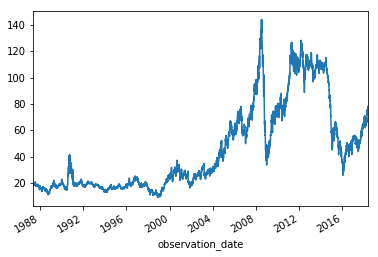

In [5]:
series.plot()
pyplot.show()

C:\Users\Parija\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


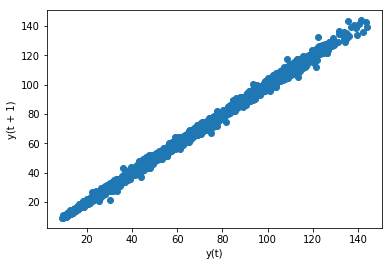

In [6]:
lag_plot(series)
pyplot.show()

In [7]:
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999486
t+1  0.999486  1.000000


Lag: 36
Coefficients: [  3.49489494e-02   1.03528001e+00  -3.84547751e-02  -6.78075977e-03
   1.25194096e-02  -1.03565656e-04  -1.87257697e-02   3.07582186e-02
  -2.02235874e-02   2.95574368e-02  -1.59105653e-02  -5.74374777e-03
  -4.78304201e-03   1.54568913e-03   6.30805126e-02  -6.87801791e-02
  -7.73643898e-03  -4.18295199e-03   1.50890100e-02   3.59565453e-02
  -3.68921617e-02  -6.95265198e-03   1.39917363e-02   1.68379896e-02
   1.21963680e-02  -3.12668530e-02   1.01460422e-02  -3.02807983e-02
   2.97361682e-02   2.77934823e-02  -3.45916335e-02   2.47218252e-03
  -1.44980350e-03  -1.09446485e-02   5.65483801e-02  -6.94316591e-02
   1.90743568e-02]
predicted=73.274892, expected=73.450000
predicted=73.234730, expected=74.750000
predicted=73.363835, expected=74.160000
predicted=73.364178, expected=77.600000
predicted=73.433473, expected=77.590000
predicted=73.510709, expected=77.370000
predicted=73.619011, expected=78.170000
Test MSE: 10.541


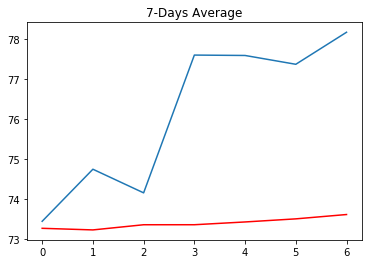

In [8]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.title('7-Days Average')
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 36
Coefficients: [  3.49274330e-02   1.03513990e+00  -3.83307690e-02  -6.55836038e-03
   1.23004650e-02  -3.29638628e-04  -1.82178627e-02   3.03685661e-02
  -2.01373055e-02   3.00366342e-02  -1.59520695e-02  -6.39461021e-03
  -4.48054767e-03   1.57648533e-03   6.28577784e-02  -6.80359361e-02
  -7.72936450e-03  -4.59242233e-03   1.50325321e-02   3.55797965e-02
  -3.72521262e-02  -6.22358499e-03   1.39500119e-02   1.66041702e-02
   1.22656333e-02  -3.12565766e-02   1.01993683e-02  -2.99411694e-02
   2.99031227e-02   2.74385161e-02  -3.46228266e-02   2.56181404e-03
  -1.72890689e-03  -1.09591596e-02   5.64831008e-02  -6.92344205e-02
   1.90343065e-02]
predicted=75.605412, expected=75.920000
predicted=75.523221, expected=74.850000
predicted=75.454205, expected=73.140000
predicted=75.647240, expected=73.450000
predicted=75.594989, expected=74.750000
predicted=75.709390, expected=74.160000
predicted=75.717687, expected=77.600000
predicted=75.771084, expected=77.590000
predicted=75.84131

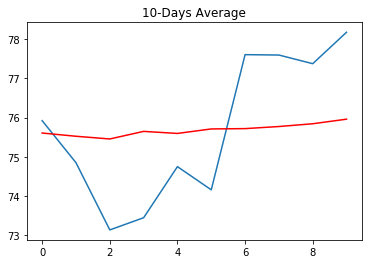

In [9]:
# split dataset
X = series.values
train, test = X[1:len(X)-10], X[len(X)-10:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.title('10-Days Average')
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=73.289871, expected=72.050000
predicted=71.893506, expected=71.710000
predicted=71.602643, expected=73.730000
predicted=73.691120, expected=74.850000
predicted=74.971688, expected=74.620000
predicted=74.672648, expected=74.540000
predicted=74.528269, expected=75.860000
predicted=75.958111, expected=73.790000
predicted=73.738239, expected=75.390000
predicted=75.592685, expected=75.330000
predicted=75.607523, expected=75.920000
predicted=75.846752, expected=74.850000
predicted=74.743503, expected=73.140000
predicted=73.282181, expected=73.450000
predicted=73.412758, expected=74.750000
predicted=74.918928, expected=74.160000
predicted=74.130773, expected=77.600000
predicted=77.777634, expected=77.590000
predicted=77.674227, expected=77.370000
predicted=77.436127, expected=78.170000
Test MSE: 1.780


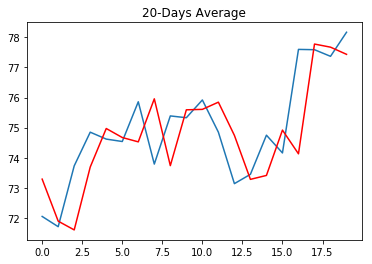

In [10]:
# split dataset
X = series.values
train, test = X[1:len(X)-20], X[len(X)-20:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.title('20-Days Average')
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=68.322834, expected=69.020000
predicted=69.164429, expected=69.020000
predicted=68.977452, expected=66.040000
predicted=65.852019, expected=66.540000
predicted=66.584361, expected=66.510000
predicted=66.802417, expected=68.190000
predicted=68.288580, expected=70.670000
predicted=70.749828, expected=72.740000
predicted=72.825543, expected=71.440000
predicted=71.284393, expected=73.180000
predicted=73.285949, expected=72.050000
predicted=71.891454, expected=71.710000
predicted=71.601162, expected=73.730000
predicted=73.694549, expected=74.850000
predicted=74.981280, expected=74.620000
predicted=74.672663, expected=74.540000
predicted=74.528507, expected=75.860000
predicted=75.958110, expected=73.790000
predicted=73.729747, expected=75.390000
predicted=75.591559, expected=75.330000
predicted=75.612296, expected=75.920000
predicted=75.846677, expected=74.850000
predicted=74.738437, expected=73.140000
predicted=73.284635, expected=73.450000
predicted=73.405409, expected=74.750000


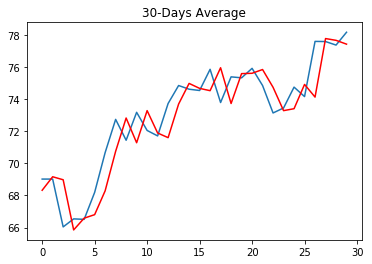

In [11]:
# split dataset
X = series.values
train, test = X[1:len(X)-30], X[len(X)-30:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.title('30-Days Average')
pyplot.plot(predictions, color='red')
pyplot.show()

In [15]:
spread = std*0.2
spread

6.609680161664035

In [19]:
spread_high = std+spread
spread_high

39.65808096998421

In [20]:
spread_low = std-spread
spread_low

26.43872064665614